# Introduction

<center><img src="https://images.unsplash.com/photo-1517976547714-720226b864c1?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1740&q=80" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [7]:
df_data.shape

(4324, 9)

In [8]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [9]:
df_data.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [10]:
df_data.duplicated().sum()

0

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [11]:
df_data.drop(labels=["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

In [12]:
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True)

In [13]:
df_data["Price"] = df_data["Price"].str.replace(',', '')
df_data["Price"]=pd.to_numeric(df_data["Price"])

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


## Descriptive Statistics

In [15]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


In [16]:
df_data["Mission_Status"].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [17]:
df_data["Date"].dt.year.value_counts()

1971    119
2018    117
1977    114
1975    113
1976    113
       ... 
2010     37
2005     37
1958     28
1959     20
1957      3
Name: Date, Length: 64, dtype: int64

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [18]:
df_data["Organisation"].value_counts().head(10)


RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: Organisation, dtype: int64

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

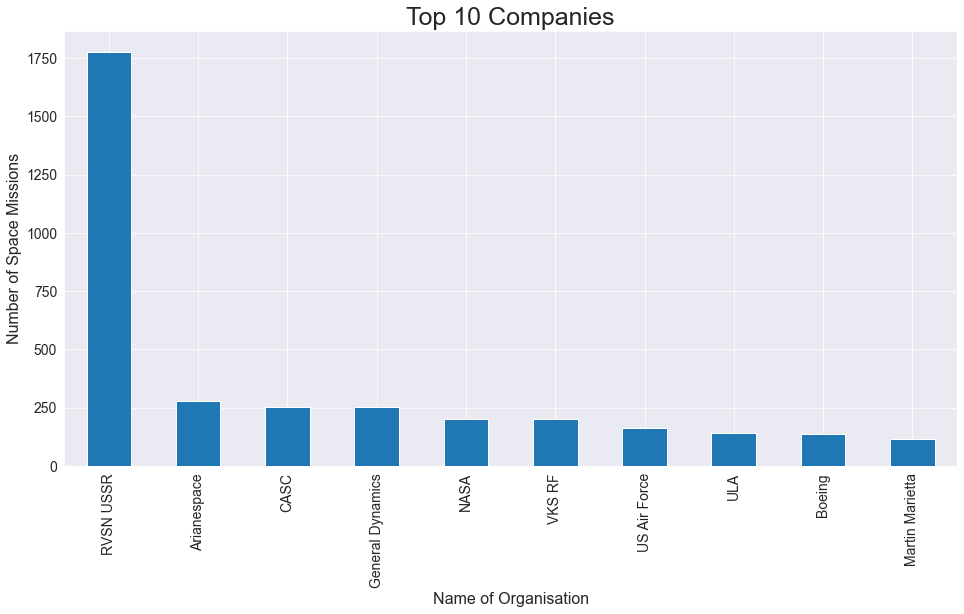

In [123]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(16,8))
df_data["Organisation"].value_counts()[0:10].plot(kind='bar')


plt.title("Top 10 Companies", fontsize=25)
plt.ylabel("Number of Space Missions", fontsize=16)
plt.xlabel("Name of Organisation", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [20]:
active_retired=df_data["Rocket_Status"].value_counts()

Text(0.5, 1.0, 'Rocket status')

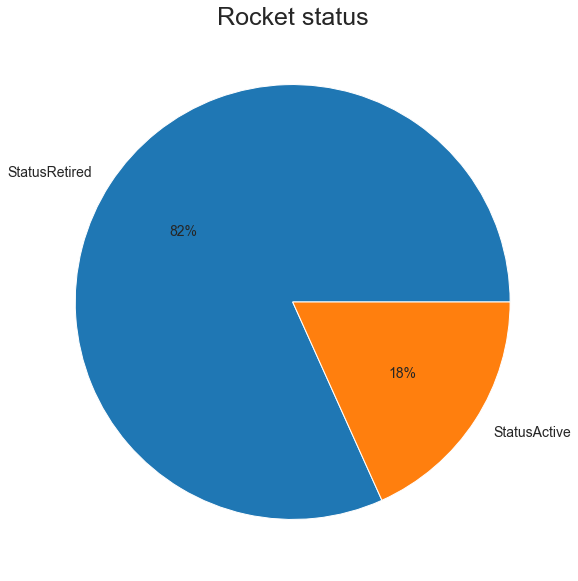

In [122]:
plt.figure(figsize=(10,10))
plt.pie(active_retired, labels=active_retired.index, autopct='%.0f%%', textprops={'fontsize': 14})
plt.title("Rocket status", fontsize=25)


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [22]:
mission_output=df_data["Mission_Status"].value_counts()
mission_output

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

Text(0.5, 1.0, 'Mission status')

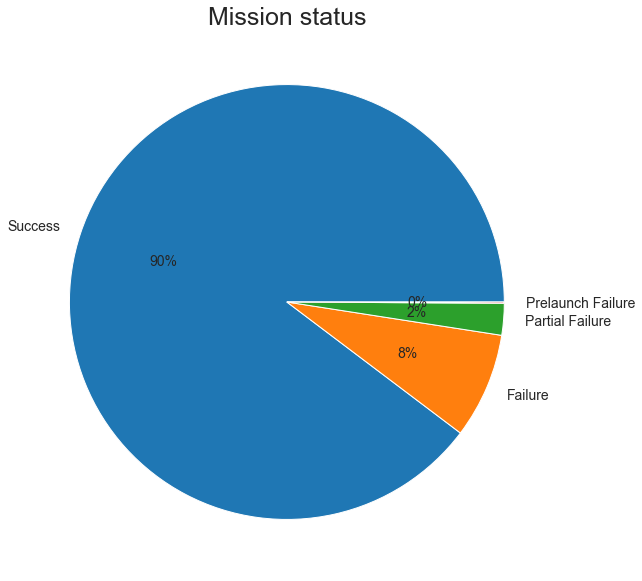

In [121]:
plt.figure(figsize=(10,10))
plt.pie(mission_output, labels=mission_output.index, autopct='%.0f%%', textprops={'fontsize': 14})
plt.title("Mission status", fontsize=25)


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

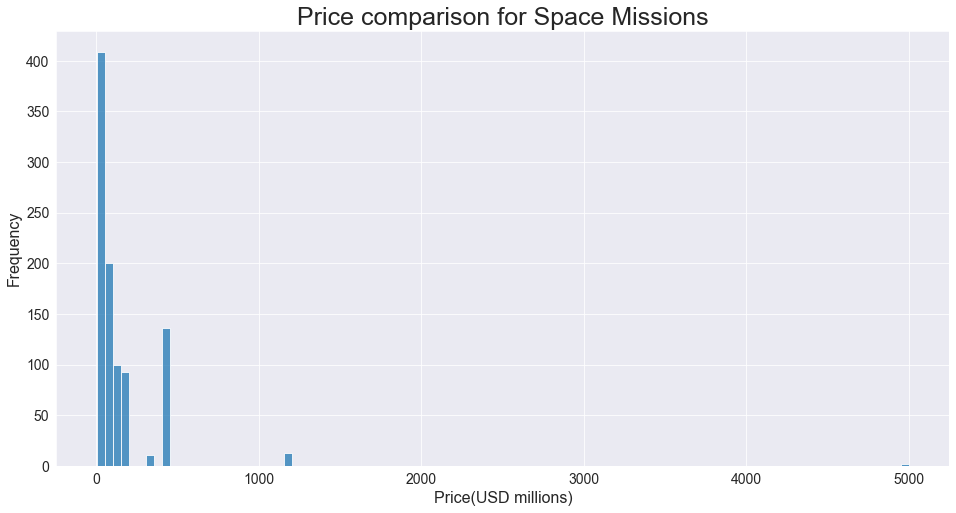

In [119]:
price_compare=df_data.dropna()
plt.figure(figsize=(16,8))
sns.histplot(data=price_compare,
    x="Price",
    y=None,
    bins=100)
plt.title("Price comparison for Space Missions", fontsize=25)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Price(USD millions)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [25]:
df_data["Country"]=df_data['Location'].apply(lambda x: x.split(",")[-1].strip())
df_data["Country"].value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

In [26]:
df_data['Country'].replace(
    {
        'Russia':'Russian Federation',
        'Iran':'Iran, Islamic Republic of',
        'New Mexico':'USA',
        'Barents Sea':'Russian Federation',
        'Gran Canaria':'USA',
        'Yellow Sea':'China',
        'Shahrud Missile Test Site':'Iran, Islamic Republic of',
        'Pacific Missile Range Facility':'USA',
        'North Korea':"Korea, Democratic People's Republic of",
        'Pacific Ocean':'Kiribati',
        'South Korea':'Korea, Republic of'
    }, 
    inplace=True
)
df_data['Country'] = df_data['Country'].apply(lambda x: countries.get(x).alpha3)
df_data['Country'].value_counts()

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
KIR      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: Country, dtype: int64

In [118]:
launches_by_country=df_data['Country'].value_counts()
px.choropleth(
    launches_by_country,
    locations=launches_by_country.index,
    color=launches_by_country.values,
    labels={"color":"No. of launches",
           "index":"Name"},
    title = 'Number of Launches by Countries'
)

# Use a Choropleth Map to Show the Number of Failures by Country


In [28]:
df_data["Mission_Status"].replace(
    {
    "Prelaunch Failure":"Failure",
    "Partial Failure":"Failure",
    },
    inplace=True
)
failures_by_country=df_data[df_data["Mission_Status"]=="Failure"]["Country"].value_counts()


In [117]:

px.choropleth(
    failures_by_country,
    locations=failures_by_country.index,
    color=failures_by_country.values,
    labels={"color":"No. of failed launches",
           "index":"Name"},
    title = 'Number of Failed launches by Countries'
)

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [30]:
px.sunburst(df_data, path=['Country', 'Organisation', 'Mission_Status'], title='Mission Status by Country and Organization')


In [31]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [32]:
d1=df_data.groupby("Organisation")["Price"].sum()
money_spent = d1[d1.values!=0].sort_values(ascending=False)
money_spent

Organisation
NASA              76,280.00
Arianespace       16,345.00
ULA               14,798.00
RVSN USSR         10,000.00
CASC               6,340.26
SpaceX             5,444.00
Northrop           3,930.00
MHI                3,532.50
ISRO               2,177.00
US Air Force       1,550.92
VKS RF             1,548.90
ILS                1,320.00
Boeing             1,241.00
Roscosmos          1,187.50
Martin Marietta      721.40
Kosmotras            638.00
Eurockot             543.40
Lockheed             280.00
JAXA                 168.00
Rocket Lab            97.50
ESA                   37.00
ExPace                28.30
EER                   20.00
Sandia                15.00
Virgin Orbit          12.00
Name: Price, dtype: float64

Text(0.5, 0, '')

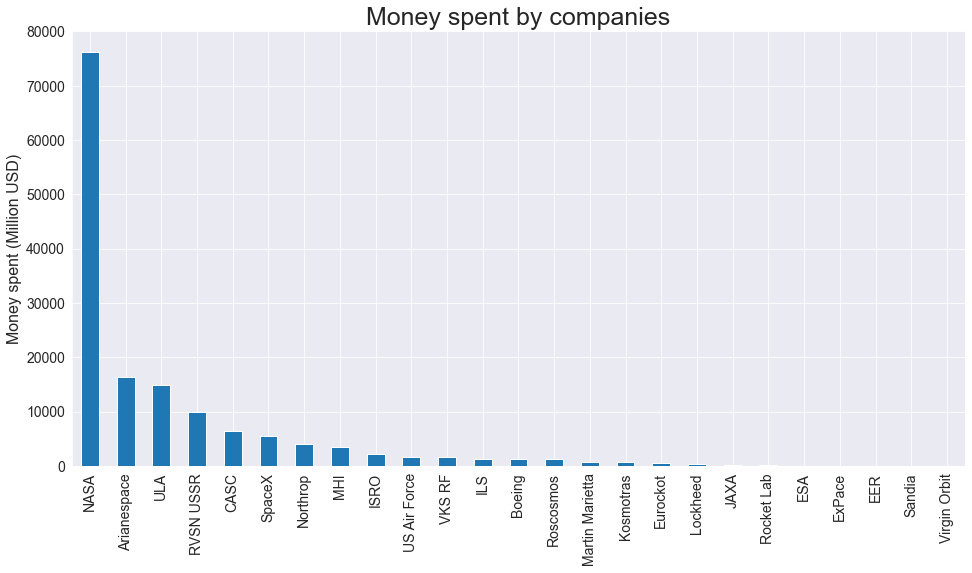

In [120]:
plt.figure(figsize=(16,8))
money_spent.plot(kind="bar")
plt.title("Money spent by companies", fontsize=25)
plt.ylabel("Money spent (Million USD)", fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,rotation=90)
plt.xlabel("")

# Analyse the Amount of Money Spent by Organisation per Launch

In [126]:
money = df_data.groupby("Organisation").agg({"Price":np.mean}).dropna()
money.head()

,Price
Organisation,
Arianespace,170.26
Boeing,177.29
CASC,40.13
EER,20.00
ESA,37.00


Text(0.5, 0, '')

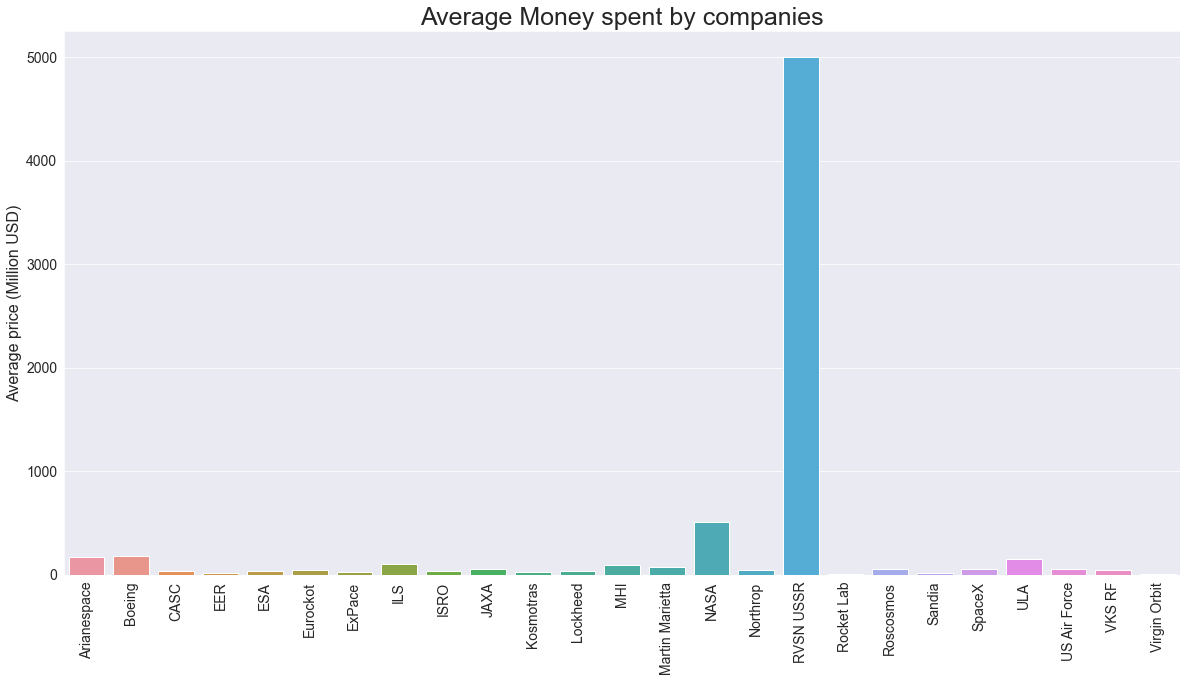

In [35]:
plt.figure(figsize=(20,10))
sns.barplot(x=money.index,
    y="Price",
    data=money)

plt.title("Average Money spent by companies", fontsize=25)
plt.ylabel("Average price (Million USD)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,rotation=90)
plt.xlabel("")



Text(0.5, 0, '')

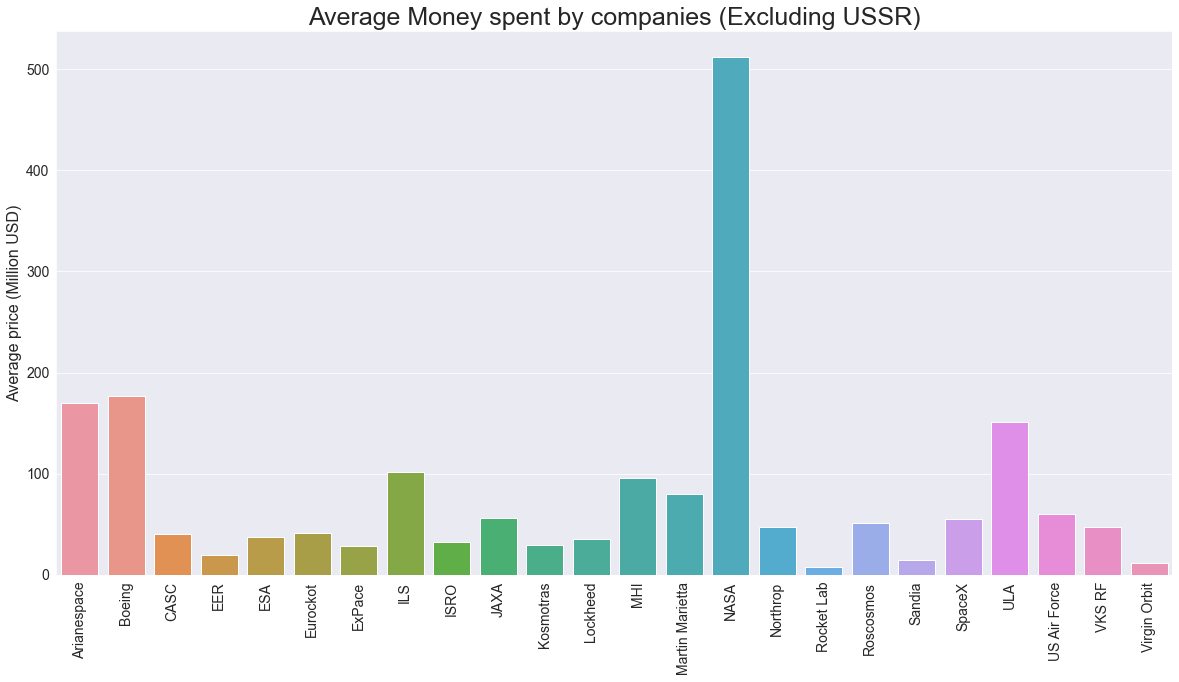

In [36]:
exclude_USSR = df_data.groupby("Organisation").agg({"Price":np.mean}).dropna().drop("RVSN USSR")
exclude_USSR
plt.figure(figsize=(20,10))
sns.barplot(x=exclude_USSR.index,
    y="Price",
    data=exclude_USSR)

plt.title("Average Money spent by companies (Excluding USSR)", fontsize=25)
plt.ylabel("Average price (Million USD)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,rotation=90)
plt.xlabel("")

# Chart the Number of Launches per Year

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

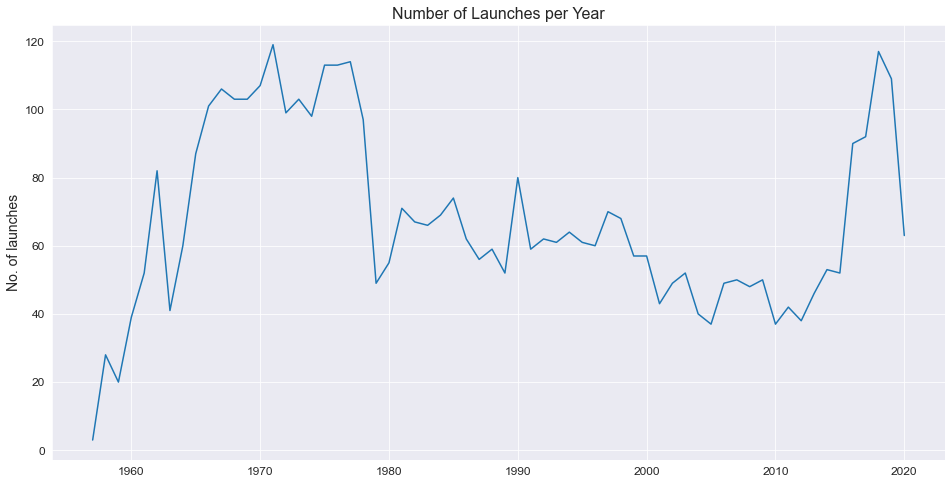

In [115]:
df_data["Year"]=df_data["Date"].dt.year

plt.figure(figsize=(16,8))
d1=df_data["Year"].value_counts()
sns.lineplot(x = d1.index, y = d1.values, data = d1)
plt.xlabel("",fontsize=14)
plt.ylabel("No. of launches",fontsize=14)
plt.title("Number of Launches per Year",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

(array([250., 275., 300., 325., 350., 375., 400., 425., 450., 475.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

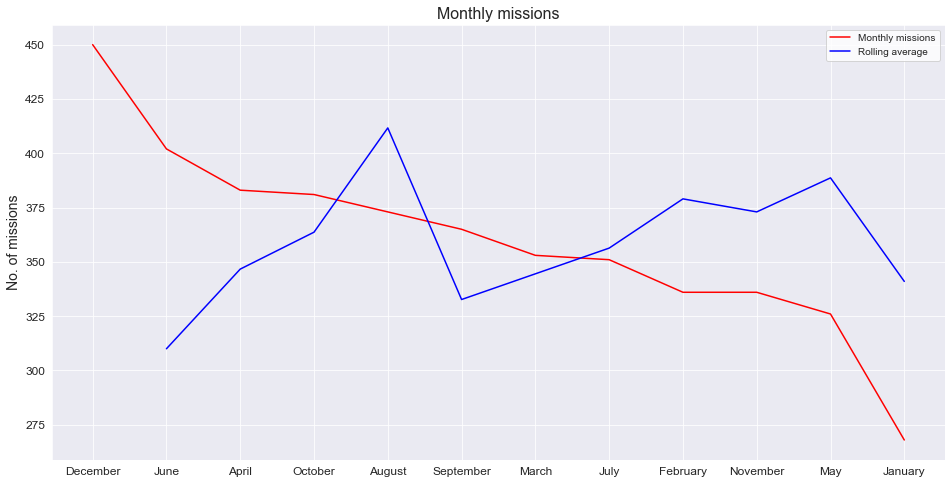

In [114]:
df_data["Month"]=df_data["Date"].dt.month_name()
df_data["Month_n"]=df_data["Date"].dt.month

d=df_data["Month"].value_counts()

d1=df_data["Month_n"].value_counts()
d2=d1.rolling(3).mean()


fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x = d.index, 
             y = d.values, 
             data = d,
             color='r',
             ax=ax)
sns.lineplot(x = d2.index, 
             y = d2.values, 
             data = d2,
             color='b',
             ax=ax)    

ax.legend(['Monthly missions', 'Rolling average'], facecolor='w')
plt.xlabel("",fontsize=14)
plt.ylabel("No. of missions",fontsize=14)
plt.title("Monthly missions",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)



December has the most number of launches followed by June and April. Least popular month is January.


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [39]:
df_data["Month"].value_counts()

December     450
June         402
April        383
October      381
August       373
September    365
March        353
July         351
February     336
November     336
May          326
January      268
Name: Month, dtype: int64

As December is the most popular for launches so, winter is considered for launch more than other seasons

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

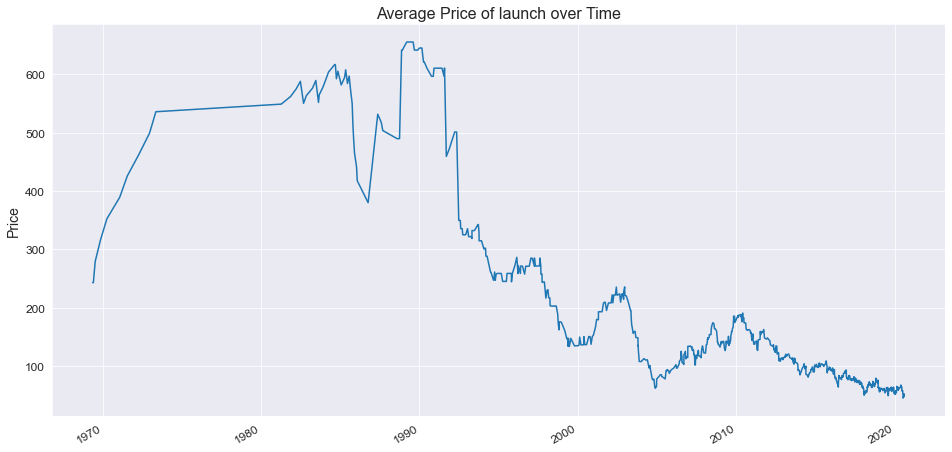

In [112]:
d = df_data.dropna().groupby('Date')['Price'].mean()
d.rolling(30).mean().plot(figsize = (16,8))
plt.xlabel("",fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.title("Average Price of launch over Time",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [137]:
top_10 = df_data['Organisation'].value_counts().sort_values(ascending=False)[:10].index.tolist()
top_10


['RVSN USSR',
 'Arianespace',
 'CASC',
 'General Dynamics',
 'NASA',
 'VKS RF',
 'US Air Force',
 'ULA',
 'Boeing',
 'Martin Marietta']

In [147]:
d = df_data[df_data['Organisation'].isin(top_10_organisations)].groupby(['Year','Organisation'])['Detail'].count()
d.fillna(0, inplace=True) 
d

Year  Organisation    
1957  RVSN USSR            2
1958  NASA                 2
      RVSN USSR            5
      US Air Force         2
1959  General Dynamics     1
                          ..
2019  VKS RF               8
2020  Arianespace          4
      CASC                19
      ULA                  4
      VKS RF               3
Name: Detail, Length: 323, dtype: int64

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

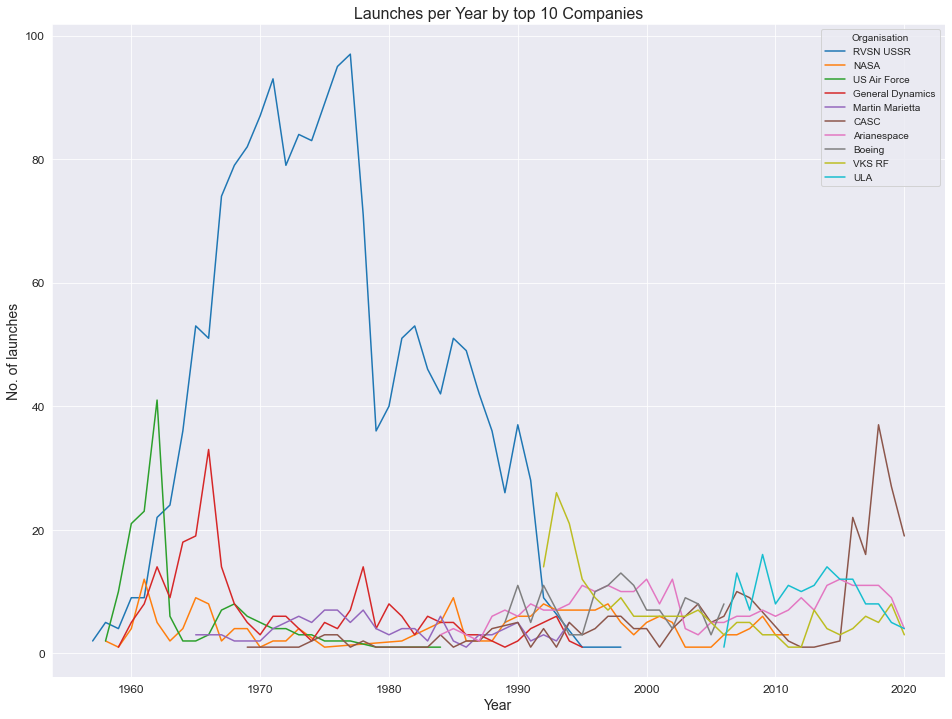

In [149]:
plt.figure(figsize=(16,12))

sns.lineplot(
    y=d.values,
    x="Year",
    hue="Organisation",
    data=d)

plt.xlabel("Year",fontsize=14)
plt.ylabel("No. of launches",fontsize=14)
plt.title("Launches per Year by top 10 Companies",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

RVSN was dominant between 1960 and 1990 and after that a lot of new companies came in. In 2000s CASC launched more rockets than others.

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [42]:
cold_war=df_data[df_data["Year"]<=1991].sort_values("Year")

In [43]:
cold_war.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month,Month_n
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,KAZ,1957,October,10
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,1957,November,11
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957,December,12
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958,February,2
4293,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA",1958-12-18 23:02:00+00:00,SM-65B Atlas | SCORE,StatusRetired,NaN,Success,USA,1958,December,12


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [44]:
cold_war["Country"].replace(
     to_replace="KAZ",
     value="RUS",
     inplace=True)
ussr_usa = cold_war[(cold_war["Country"]=="USA") | (cold_war["Country"]=="RUS")]
ussr_usa.reset_index(drop=True)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month,Month_n
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,RUS,1957,October,10
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,RUS,1957,November,11
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957,December,12
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958,February,2
4,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA",1958-12-18 23:02:00+00:00,SM-65B Atlas | SCORE,StatusRetired,NaN,Success,USA,1958,December,12
...,...,...,...,...,...,...,...,...,...,...,...
2427,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-06-04 09:00:00+00:00,Tsyklon-3 | Okean 3,StatusRetired,NaN,Success,RUS,1991,June,6
2428,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1991-06-05 13:24:00+00:00,Space Shuttle Columbia | STS-40,StatusRetired,450.00,Success,USA,1991,June,6
2429,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-06-11 05:42:00+00:00,Cosmos-3M (11K65M) | Cosmos 2150,StatusRetired,NaN,Success,RUS,1991,June,6
2430,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-06-13 15:41:00+00:00,Tsyklon-3 | Cosmos 2151,StatusRetired,NaN,Success,RUS,1991,June,6


In [110]:
fig= px.pie(ussr_usa, values=ussr_usa['Country'].value_counts(), names=ussr_usa['Country'].unique(),title='Space Missions during cold war b/w USSR and USA')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

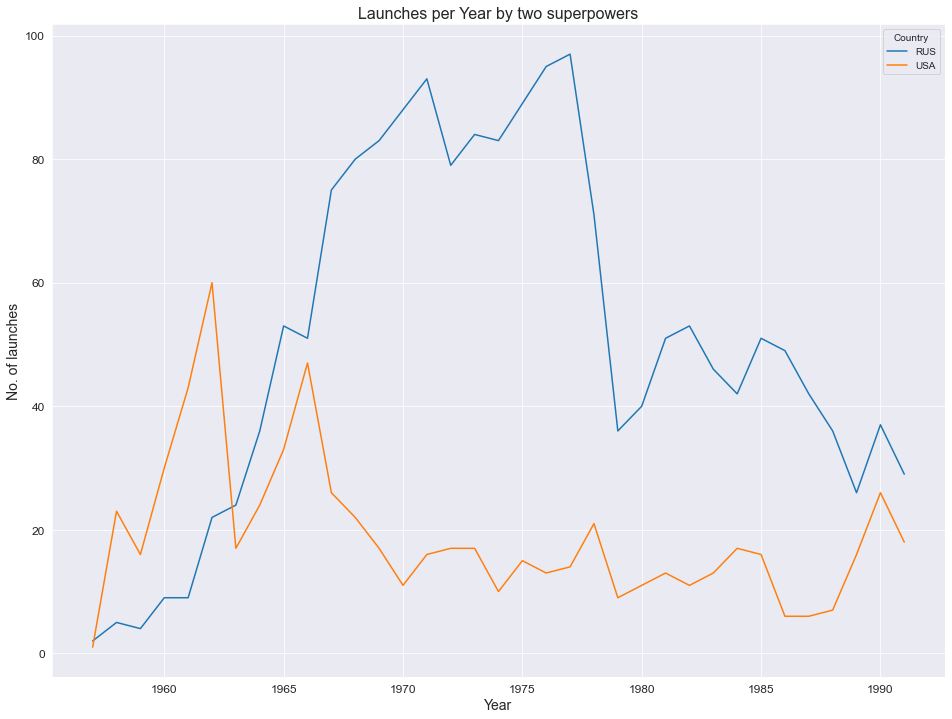

In [46]:
d=ussr_usa.groupby("Year")["Country"].value_counts()
plt.figure(figsize=(16,12))
sns.lineplot(
    y=d.values,
    x="Year",
    hue="Country",
    data=d)

plt.xlabel("Year",fontsize=14)
plt.ylabel("No. of launches",fontsize=14)
plt.title("Launches per Year by two superpowers",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


## Chart the Total Number of Mission Failures Year on Year.

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

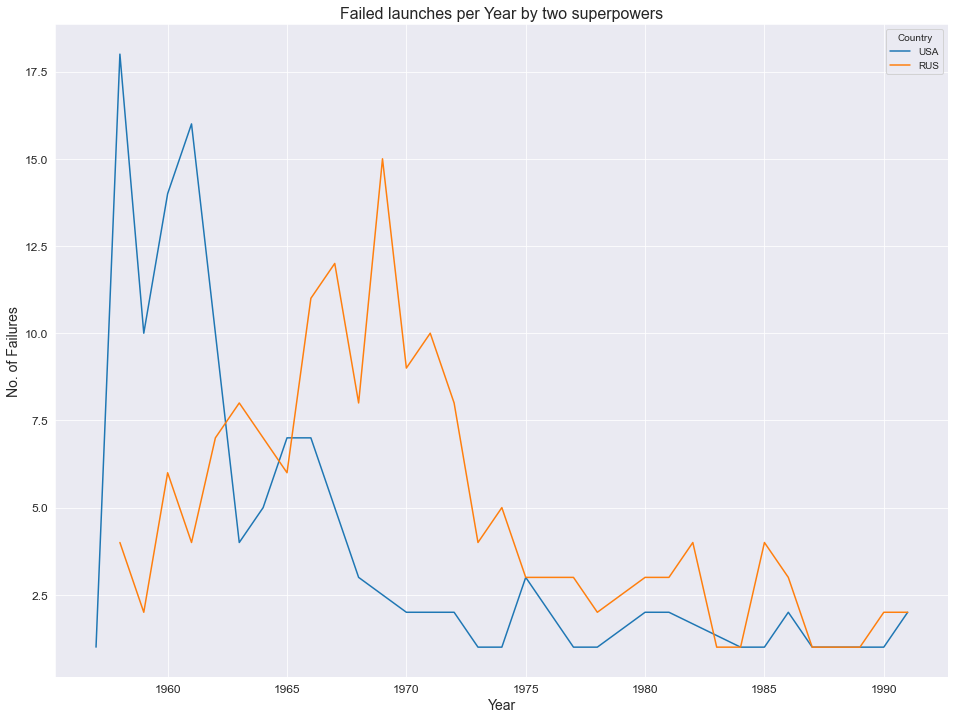

In [47]:
d=ussr_usa[ussr_usa["Mission_Status"]=="Failure"].groupby(["Year","Country"])["Mission_Status"].value_counts()
plt.figure(figsize=(16,12))
sns.lineplot(
    y=d.values,
    x="Year",
    hue="Country",
    data=d)
plt.xlabel("Year",fontsize=14)
plt.ylabel("No. of Failures",fontsize=14)
plt.title("Failed launches per Year by two superpowers",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [160]:
failures = ussr_usa[ussr_usa["Mission_Status"]=="Failure"].groupby(["Year","Country"])["Mission_Status"].count()
total = ussr_usa.groupby(["Year","Country"])["Mission_Status"].count()
pct = (failures/total)*100
pct.fillna(0,inplace=True)
pct


Year  Country
1957  RUS         0.00
      USA       100.00
1958  RUS        80.00
      USA        78.26
1959  RUS        50.00
                 ...  
1989  USA         0.00
1990  RUS         5.41
      USA         3.85
1991  RUS         6.90
      USA        11.11
Name: Mission_Status, Length: 70, dtype: float64

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

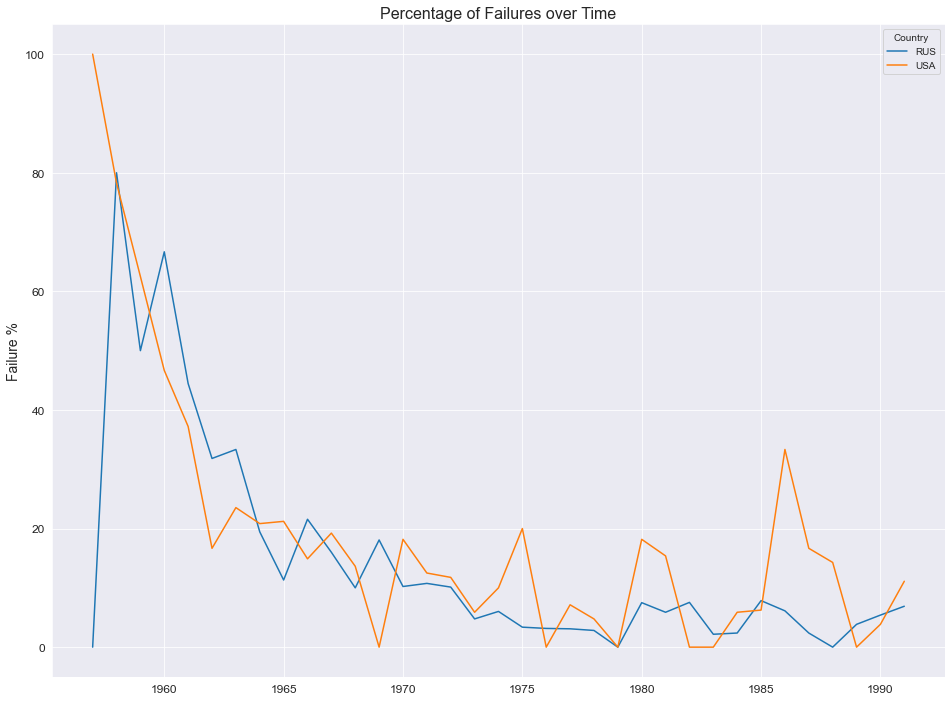

In [163]:
plt.figure(figsize=(16,12))
sns.lineplot(
    y=pct.values,
    x="Year",
    hue="Country",
    data=pct)

plt.xlabel("",fontsize=14)
plt.ylabel("Failure %",fontsize=14)
plt.title("Percentage of Failures over Time",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


Failures have drastically reduced over time due to the development in science and technology. At one time it was more than 50% and now it is less than 15%.

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

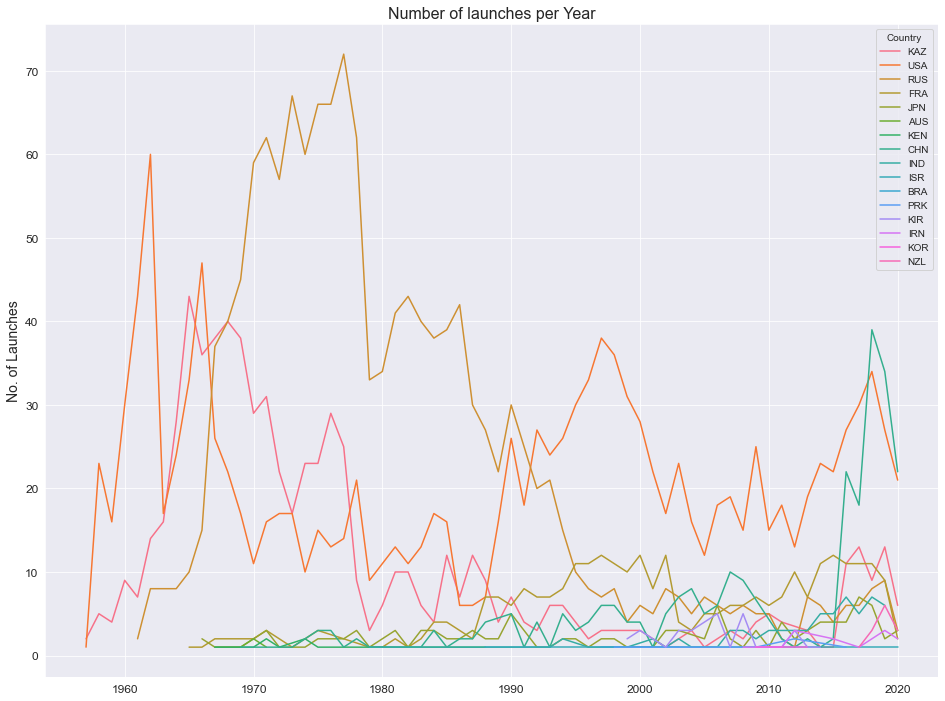

In [165]:
d=df_data.groupby(["Year","Country"])["Mission_Status"].count()
d.fillna(0, inplace=True)
plt.figure(figsize=(16,12))
sns.lineplot(
    y=d.values,
    x="Year",
    hue="Country",
    data=d)
plt.xlabel("",fontsize=14)
plt.ylabel("No. of Launches",fontsize=14)
plt.title("Number of launches per Year",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

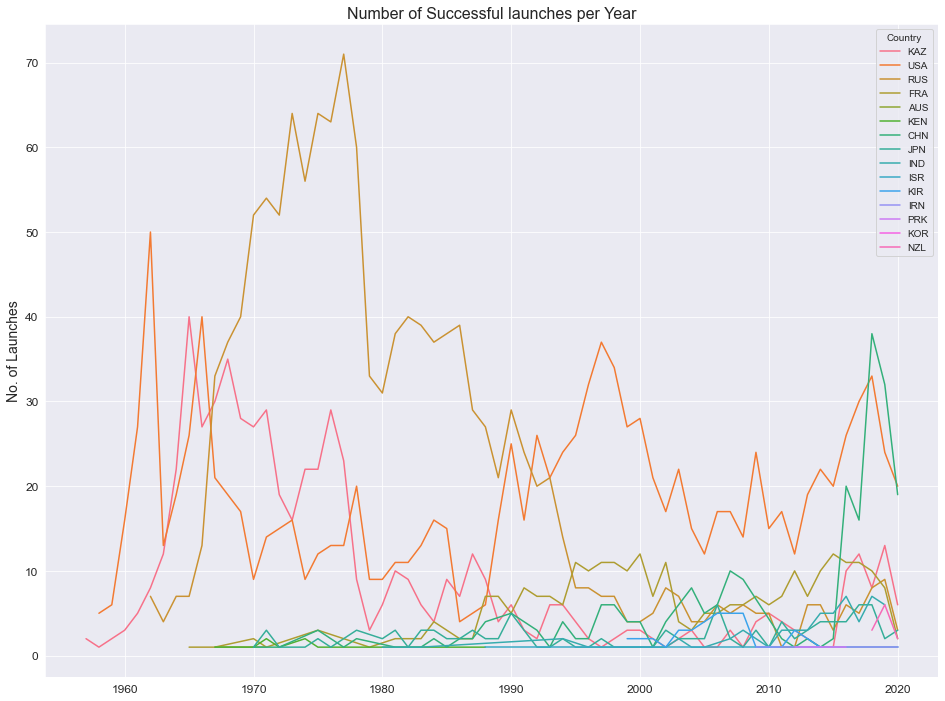

In [172]:
d=df_data[df_data["Mission_Status"]=="Success"].groupby(["Year","Country"])["Mission_Status"].count()
d.fillna(0, inplace=True)
plt.figure(figsize=(16,12))
sns.lineplot(
    y=d.values,
    x="Year",
    hue="Country",
    data=d)
plt.xlabel("",fontsize=14)
plt.ylabel("No. of Launches",fontsize=14)
plt.title("Number of Successful launches per Year",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


As we move forward in time both graphs tend to be similar because the failures are reducing year by year.

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [108]:
d=df_data.groupby(["Organisation","Year"])["Mission_Status"].count()
d.fillna(0, inplace=True)

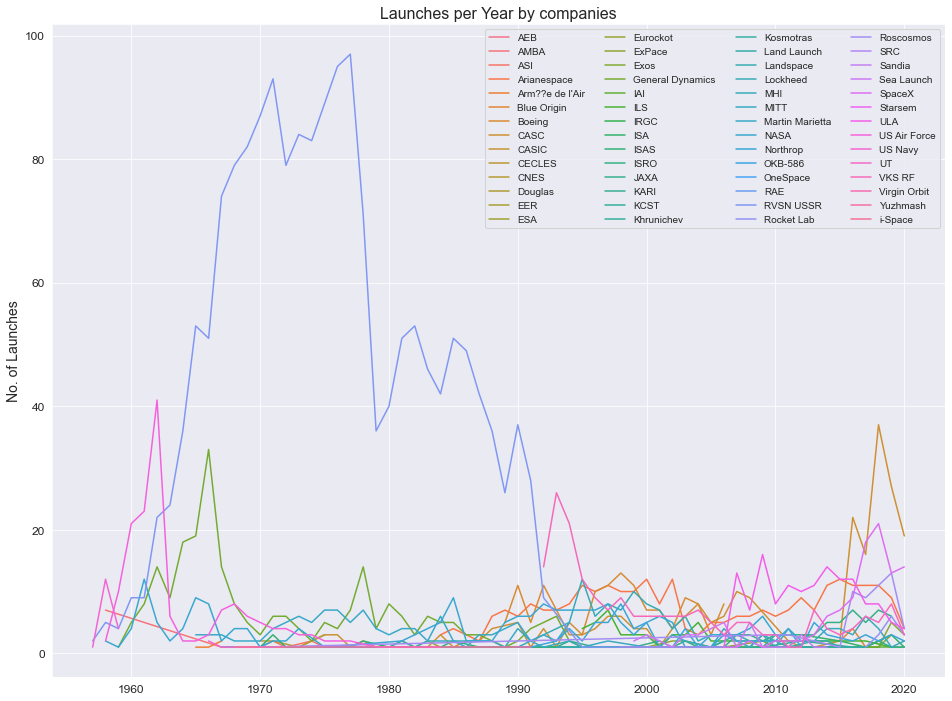

In [109]:

plt.figure(figsize=(16,12))
sns.lineplot(
    y=d.values,
    x="Year",
    hue="Organisation",
    data=d)
plt.xlabel("",fontsize=14)
plt.ylabel("No. of Launches",fontsize=14)
plt.title("Launches per Year by companies",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", ncol=4)

Earlier US air force and RVSN were leaders and now the lead is taken by CASC.